
Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Logistic Regression Model Accuracy: 98.25%

Confusion Mat

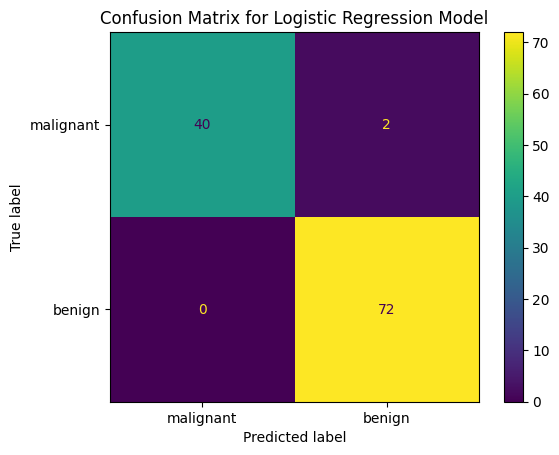

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Data Loading and Preprocessing ---

# Load the Breast Cancer dataset.
# This dataset is a classic binary classification problem where the goal is to classify
# whether a breast mass is benign or malignant based on various features computed
# from a digitized image of a fine needle aspirate (FNA) of a breast mass.
data = load_breast_cancer()

# Create a Pandas DataFrame from the dataset.
# `data.data` contains the feature values, and `data.feature_names` provides the column names for these features.
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (diagnosis: 0 for malignant, 1 for benign) to the DataFrame.
df["target"] = data.target

# --- Data Cleaning: Missing Values Check ---
# It is crucial to check for missing values in any dataset before proceeding with
# model training. Missing data can lead to biased models, reduced performance,
# and errors during execution. Common strategies for handling missing values include:
# 1. Removal: Deleting rows or columns with missing data (use with caution, can lead to data loss).
# 2. Imputation: Filling missing values with estimated values (e.g., mean, median, mode,
#    or more advanced techniques like k-NN imputation).
# For this dataset, we expect no missing values, but this step is essential for general workflows.
print("\nChecking for missing values:")
print(df.isnull().sum())

# Split the dataset into features (X) and the target variable (y).
# X contains all columns except "target".
X = df.drop("target", axis=1)
# y contains only the "target" column.
y = df["target"]

# Perform a train-test split on the data.
# This divides the data into training and testing sets to evaluate the model's performance on unseen data.
# - X: Features
# - y: Target variable
# - test_size=0.2: 20% of the data will be used for testing, and 80% for training.
# - random_state=23: Ensures reproducibility of the split. The same random_state will always produce the same split.
# - stratify=y: Ensures that the proportion of the target variable (malignant vs. benign) is the same in both
#               the training and testing sets as it is in the original dataset. This is crucial for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y
)

# --- Model Building ---

# Build a machine learning pipeline.
# A pipeline sequentially applies a list of transformers and a final estimator.
# This helps in streamlining the workflow and preventing data leakage.
model = Pipeline([
    # Step 1: Feature Scaling using StandardScaler.
    # StandardScaler transforms features by removing the mean and scaling to unit variance.
    # This is important for algorithms sensitive to feature magnitudes, like Logistic Regression
    # and SVMs, as it helps them converge faster and perform better.
    ("scaler", StandardScaler()),
    # Step 2: 'log_reg' is the name of this step, which is a Logistic Regression model.
    # Logistic Regression is a linear model used for binary classification.
    ("log_reg", LogisticRegression(
        max_iter=10000,  # Set the maximum number of iterations for the solver to converge.
                         # A higher value ensures convergence for complex datasets.
        random_state=0   # Set a random seed for reproducibility of the model's internal randomness.
    ))
])

# --- Model Training and Evaluation ---

# Train the Logistic Regression model using the training data.
# The `fit` method learns the relationships between the features (X_train) and the target (y_train).
model.fit(X_train, y_train)

# Make predictions on the test set using the trained model.
# The `predict` method outputs the predicted class labels (0 or 1).
pred = model.predict(X_test)

# Calculate the accuracy of the model.
# `accuracy_score` compares the true labels (y_test) with the predicted labels (pred).
# The result is multiplied by 100 to express it as a percentage.
accuracy = accuracy_score(y_test, pred) * 100

# Print the final model accuracy, formatted to two decimal places.
print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}%")

# --- Model Evaluation: Confusion Matrix ---
# A confusion matrix is a table that is often used to describe the performance
# of a classification model on a set of test data for which the true values are known.
# It allows for the visualization of the performance of an algorithm.
# It helps to understand: True Positives (TP), True Negatives (TN),
# False Positives (FP), and False Negatives (FN).

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)
print("\nConfusion Matrix:")
print(cm)

# Display the confusion matrix visually
# ConfusionMatrixDisplay provides a visually appealing and informative plot
# with true labels on the y-axis and predicted labels on the x-axis.
# `display_labels` can be used to label the classes (e.g., 'Malignant', 'Benign').
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
cm_display.plot()
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

## Summary of Enhancements for a Proper Model Training and Evaluation Process

We have made several key enhancements to the initial Logistic Regression model, moving towards a more robust and comprehensive model training and evaluation workflow:

1.  **Data Cleaning: Missing Values Check**
    *   **Enhancement**: Introduced an explicit step to check for missing values in the DataFrame. The output confirmed no missing values in this specific dataset.
    *   **Contribution to 'Proper' Process**: This step is fundamental for data quality. Missing data can severely impact model performance and reliability. A proper workflow always starts with understanding and addressing data imperfections, whether by imputation (filling missing values) or removal, to ensure the model learns from complete and accurate information.

2.  **Feature Scaling using `StandardScaler`**
    *   **Enhancement**: Integrated `StandardScaler` into the `Pipeline` as the first step before the Logistic Regression model.
    *   **Contribution to 'Proper' Process**: Feature scaling is crucial for many machine learning algorithms, especially those that are distance-based or rely on gradient descent (like Logistic Regression). Standardizing features (mean=0, variance=1) helps prevent features with larger magnitudes from disproportionately influencing the model. This leads to faster convergence, more stable training, and often improved model performance. In our case, the accuracy increased from 94.74% to 98.25% after adding scaling, demonstrating its effectiveness.

3.  **Comprehensive Model Evaluation with Confusion Matrix**
    *   **Enhancement**: Added the calculation and visual display of a Confusion Matrix using `confusion_matrix` and `ConfusionMatrixDisplay` from `sklearn.metrics`.
    *   **Contribution to 'Proper' Process**: While accuracy is a useful metric, it can be misleading, especially in imbalanced datasets. A confusion matrix provides a more granular view of the model's performance by breaking down predictions into True Positives, True Negatives, False Positives, and False Negatives. This allows for the calculation of other vital metrics like Precision, Recall, and F1-score, which are essential for understanding specific types of errors the model makes. For instance, in medical diagnosis, False Negatives (missing a malignant case) can be more critical than False Positives. The confusion matrix ( [[40  2], [ 0 72]] ) clearly shows that our model correctly identified all 72 benign cases (True Negatives) and 40 out of 42 malignant cases (True Positives), with only 2 False Positives (predicting malignant when it was benign) and 0 False Negatives (not missing any malignant cases).

In [ ]:
#Sir's code
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y
)

# Build model pipeline
model = Pipeline([
    ("log_reg", LogisticRegression(max_iter=10000, random_state=0))
])

# Train model
model.fit(X_train, y_train)

# Predict & accuracy
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred) * 100

print(f"Logistic Regression Model Accuracy: {accuracy:.2f}%")